## Playing with NYC taxi data using Pandas
### https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [1]:
#dataset
csv_file = 'taxi-01-2020-sample.csv'

In [3]:
#checking size of file
from os import path
path.getsize(csv_file) / (1024*1024)

97.92644691467285

In [55]:
help(path)

Help on module posixpath:

NAME
    posixpath - Common operations on Posix pathnames.

MODULE REFERENCE
    https://docs.python.org/3.7/library/posixpath
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    Instead of importing this module directly, import os and refer to
    this module as os.path.  The "os.path" name is an alias for this
    module on Posix systems; on other systems (e.g. Mac, Windows),
    os.path provides the same operations in a manner specific to that
    platform, and is an alias to another module (e.g. macpath, ntpath).
    
    Some of this can actually be useful on non-Posix systems too, e.g.
    for manipulation of the pathname component of URLs.

FUNCTIONS
    abspath(path)

In [59]:
path.getsize? #returns docstring

Object `os.stat` not found.


In [4]:
#import pandas library
import pandas as pd

In [6]:
df = pd.read_csv(csv_file)

In [ ]:
# quickly examine the dataset

In [14]:
type(df), type(df['VendorID'])
#dataframes made up of several series (columns)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [7]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [8]:
df.dtypes #data types ... pandas's best guess!

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [9]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2003-01-01 00:07:17,2003-01-01 14:16:59,1.0,0.00,1.0,N,193,193,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2008-12-31 23:35:00,2008-12-31 23:36:53,1.0,0.42,1.0,N,263,263,2.0,3.5,0.5,0.5,0.0,0.0,0.3,7.3,2.5
2,2,2009-01-01 00:06:19,2009-01-01 00:10:22,1.0,0.85,1.0,N,107,137,2.0,5.0,0.0,0.5,0.0,0.0,0.3,8.3,2.5
3,2,2009-01-01 00:48:28,2009-01-01 00:57:48,1.0,0.93,1.0,N,100,186,2.0,7.5,0.0,0.5,0.0,0.0,0.3,10.8,2.5
4,2,2009-01-01 00:49:38,2009-01-01 00:56:51,1.0,0.39,5.0,N,78,78,2.0,74.5,0.0,0.0,0.0,0.0,0.3,74.8,0.0


In [11]:
#set datetime formats
time_cols = ['tpep_pickup_datetime','tpep_dropoff_datetime']
df = pd.read_csv(csv_file, parse_dates=time_cols)

In [12]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [13]:
df.sample(5) #alternative to pd.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
105146,2,2020-01-04 22:06:25,2020-01-04 22:14:54,2.0,0.70,1.0,N,161,163,1.0,6.5,0.5,0.5,3.09,0.0,0.3,13.39,2.5
87944,2,2020-01-04 11:53:08,2020-01-04 11:59:40,1.0,1.24,1.0,N,237,161,1.0,7.0,0.0,0.5,2.06,0.0,0.3,12.36,2.5
613904,2,2020-01-20 18:49:01,2020-01-20 18:52:52,1.0,0.47,1.0,N,230,48,2.0,4.5,0.0,0.5,0.00,0.0,0.3,7.80,2.5
767938,2,2020-01-25 09:01:19,2020-01-25 09:10:09,6.0,1.56,1.0,N,186,230,2.0,8.0,0.0,0.5,0.00,0.0,0.3,11.30,2.5
892042,1,2020-01-29 07:26:22,2020-01-29 07:42:20,1.0,4.80,1.0,N,132,215,2.0,17.0,0.0,0.5,0.00,0.0,0.3,17.80,0.0


In [15]:
#who are the vendors?

In [17]:
df['VendorID'].unique()

array([2, 1])

In [18]:
len(df)

1000000

In [21]:
f'{len(df):,}' #with a thousands separator

'1,000,000'

In [22]:
#how many rides per vendor?

In [23]:
df['VendorID'].value_counts()

2    669949
1    330051
Name: VendorID, dtype: int64

In [26]:
#Generate more descriptive version of a numeric column
names = {
    1: 'Creative',
    2: 'VeriFone',
}
df['Vendor'] = df['VendorID'].map(names)
df['Vendor'].value_counts()

VeriFone    669949
Creative    330051
Name: Vendor, dtype: int64

In [27]:
#Let's take a look at ride distance - sense check to start
df['trip_distance'].describe()

count    1000000.000000
mean           2.844830
std            3.749369
min           -1.790000
25%            0.960000
50%            1.600000
75%            2.900000
max          122.930000
Name: trip_distance, dtype: float64

In [30]:
#browser friendly version of visualisations in Jupyter
%matplotlib inline

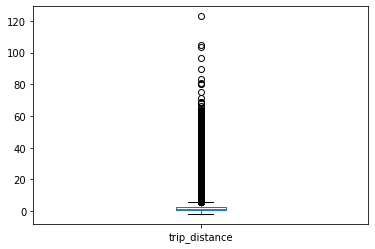

In [31]:
#basic boxplot
df['trip_distance'].plot.box

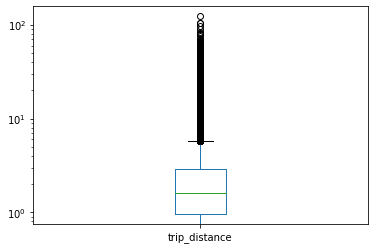

In [32]:
#basic boxplot - log scaled
df['trip_distance'].plot.box(logy=True)

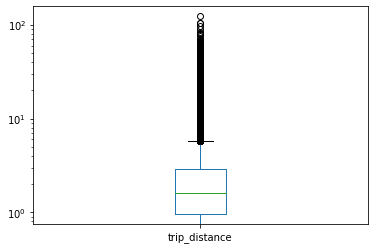

In [33]:
#basic boxplot
df['trip_distance'].plot.box(logy=True); 
#get rid of annotation with a semicolon

In [34]:
#let's get trip duration

In [35]:
duration = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
duration.describe() #sense check

count                   1000000
mean     0 days 00:15:48.632272
std      0 days 01:03:33.999824
min             0 days 00:00:00
25%             0 days 00:06:21
50%             0 days 00:10:24
75%             0 days 00:16:39
max             5 days 22:05:07
dtype: object

In [40]:
ok_duration = duration[(duration > pd.Timedelta(0)) & (duration < pd.Timedelta(hours=1))]

In [ ]:
#time delta is just a length, not a number 
#need to tell pandas what unit to have a look in

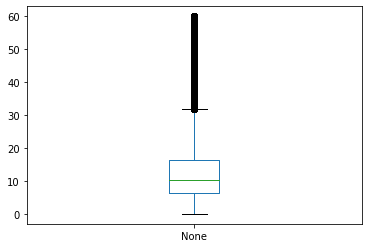

In [41]:
ok_duration /= pd.Timedelta(minutes=1)  #give me the delta divided by minutes
ok_duration.plot.box();

In [42]:
t = pd.Timestamp.now()
t.year, t.month

(2020, 11)

In [43]:
#how many rides between 11am & 12pm had more than 1 passenger?

In [44]:
mask = (df['tpep_pickup_datetime'].dt.hour ==11) & (df['passenger_count']>1)
print(len(df[mask]))

12197


In [47]:
len(df.query('tpep_pickup_datetime.dt.hour ==11 & passenger_count>1'))

12197

In [ ]:
#which day of week has the longest mean ride?

In [53]:
df.groupby(df['tpep_pickup_datetime'].dt.day_name())['trip_distance'].mean()

tpep_pickup_datetime
Friday       2.803711
Monday       2.997294
Saturday     2.710155
Sunday       3.120546
Thursday     2.815246
Tuesday      2.711240
Wednesday    2.837988
Name: trip_distance, dtype: float64

In [50]:
t.day_name()

'Monday'

In [54]:
import calendar
calendar.MONDAY, calendar.TUESDAY

(0, 1)